In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
books = pd.read_csv('Books.csv', sep=',', error_bad_lines=False, usecols=[2,3,4,5,6],encoding="latin-1")

print("Books.csv shape::", books.shape)
print("Books.csv columns:: ", books.columns)
print("Number of Unique Books::",(books.bookISBN.unique().size))

books.head()

Books.csv shape:: (3000, 5)
Books.csv columns::  Index(['bookISBN', 'bookName', 'author', 'yearOfPublication', 'publisher'], dtype='object')
Unique Books:: 3000


,bookISBN,bookName,author,yearOfPublication,publisher
0,1551669382,Enchanted Afternoon,Susan Wiggs,2002,Mira
1,0743202961,Every Breath You Take : A True Story of Obsess...,Ann Rule,2001,Free Press
2,067151699X,The HIDDEN LIFE OF DOGS,Elizabeth Marshall Thomas,1995,Pocket
3,0804108528,Inadmissible Evidence,Philip Friedman,1993,Ivy Books
4,0061094145,"The Fifth Dominion (Imajica, Book 1)",Clive Barker,1995,HarperTorch


In [14]:
users = pd.read_csv('Users.csv', sep=',', error_bad_lines=False, usecols=[2,3,4], encoding="latin-1")
print("Users.csv shape::", users.shape)
print("Users.csv columns:: ", users.columns)
print("Number of Unique Users::",(users.user.unique().size))

users.head()

Users.csv shape:: (1000, 3)
Users.csv columns::  Index(['user', 'location', 'age'], dtype='object')
Unique Users:: 1000


,user,location,age
0,43157.0,"windsor, ontario, canada",22.0
1,99032.0,"white plains, new york, usa",25.0
2,42883.0,"the woodlands, texas, usa",51.0
3,183800.0,"quebec, quebec, canada",29.0
4,188796.0,"toronto, ontario, canada",NaN


In [15]:
ratings = pd.read_csv('UserEvents.csv', sep=',', error_bad_lines=False, usecols=[1,2,3], encoding="latin-1")

print("UserEvents.csv shape::", users.shape)
print("UserEvents.csv columns:: ", users.columns)
print("Number of Unique users: ",ratings.user.unique().size)
print("Number of Unique books: ",ratings.bookId.unique().size)

ratings.head()

UserEvents.csv shape:: (1000, 3)
UserEvents.csv columns::  Index(['user', 'location', 'age'], dtype='object')
Number of Unique users:  13030
Number of Unique books:  11234


,user,bookId,impression
0,276747,0060517794,checkout
1,276747,0671537458,checkout
2,276747,0679776818,add to cart
3,276822,0060096195,checkout
4,276822,0375821813,checkout


In [23]:
print("Most popular books::")
usersperbook=ratings.bookId.value_counts()
usersperbook.head(10)


Most popular books::


0316666343    438
0385504209    339
0971880107    270
0312195516    246
059035342X    227
0142001740    221
0679781587    210
0060928336    207
0446672211    200
0671027360    190
Name: bookId, dtype: int64

In [17]:
print("Most Active users::")
booksperuser=ratings.user.value_counts()
booksperuser.head(10)

Most Active users::


11676     2803
98391      790
153662     498
16795      432
95359      378
114368     378
104636     303
123883     285
35859      281
204864     270
Name: user, dtype: int64

Visualize the UseEvents data in terms of impression

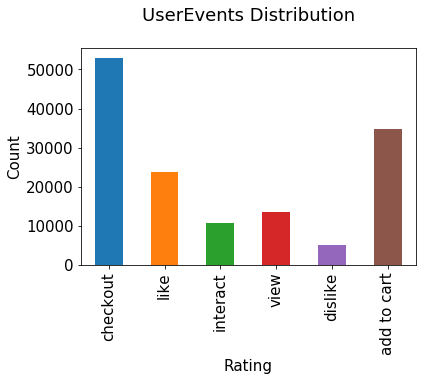

In [21]:
ratings.impression.value_counts(sort=False).plot(kind='bar')
plt.title('UserEvents Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [25]:
ratings["impression"]=ratings["impression"].map({"dislike":1,"view":2,"interact":3,"like":4,"add to cart":5,"checkout":6})

In [26]:
average_rating = pd.DataFrame(ratings.groupby('bookId')['impression'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('bookId')['impression'].count())
average_rating.sort_values('ratingCount', ascending=False).head(20)



,impression,ratingCount
bookId,,
0316666343,5.061644,438
0385504209,5.227139,339
0971880107,1.996296,270
0312195516,5.077236,246
059035342X,5.511013,227
0142001740,5.176471,221
0679781587,5.223810,210
0060928336,4.801932,207
0446672211,5.000000,200


In [27]:
ratings_pivot = ratings.pivot(index='user', columns='bookId', values="impression").fillna(0)
print(ratings_pivot.shape)
ratings_pivot.head(20)



(13030, 11234)


bookId,0002005018,0002251760,0002259001,0003300277,0006374921,0006480764,000648302X,0006485014,0006485200,0006493580,...,950491036X,9580464162,9722015184,9722020609,9726101794,9726106141,9726116902,9727722458,9770390107900,9871138148
user,,,,,,,,,,,,,,,,,,,,,
8,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
ratings_pivot.values

array([[2., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
user_list=list(ratings_pivot.index)
book_list=list(ratings_pivot.columns)

In [38]:
from scipy.sparse import coo_matrix

R = coo_matrix(ratings_pivot.values)

print ("R Shape::", R.shape)
print ("R Columns::", R.col)
print ("R Rows::",R.row)


R Shape:: (13030, 11234)
R Columns:: [   0 1487 1495 ... 2833 4229 7226]
R Rows:: [    0     1     1 ... 13029 13029 13029]


In [40]:
print(R)

  (0, 0)	2.0
  (1, 1487)	5.0
  (1, 1495)	5.0
  (1, 1812)	4.0
  (1, 5358)	6.0
  (1, 5684)	1.0
  (2, 5259)	6.0
  (2, 5313)	6.0
  (2, 5316)	5.0
  (2, 5891)	5.0
  (2, 7306)	6.0
  (2, 7753)	6.0
  (3, 6187)	5.0
  (4, 6869)	6.0
  (4, 10937)	5.0
  (4, 10954)	6.0
  (4, 11064)	5.0
  (5, 308)	6.0
  (5, 428)	4.0
  (5, 1786)	6.0
  (5, 1817)	6.0
  (5, 1844)	4.0
  (5, 2736)	6.0
  (5, 3485)	3.0
  (5, 3690)	4.0
  :	:
  (13025, 11170)	2.0
  (13025, 11194)	2.0
  (13026, 5946)	5.0
  (13026, 6389)	3.0
  (13026, 8994)	5.0
  (13026, 9063)	6.0
  (13027, 130)	6.0
  (13027, 245)	4.0
  (13027, 1068)	5.0
  (13027, 1253)	6.0
  (13027, 3435)	5.0
  (13027, 3955)	6.0
  (13027, 4572)	4.0
  (13027, 6848)	5.0
  (13027, 7396)	5.0
  (13027, 8314)	5.0
  (13027, 9282)	6.0
  (13027, 9444)	5.0
  (13028, 4426)	2.0
  (13028, 4836)	2.0
  (13028, 10193)	2.0
  (13028, 10472)	5.0
  (13029, 2833)	4.0
  (13029, 4229)	4.0
  (13029, 7226)	5.0


In [ ]:
#Performs matrix factorization of the original user item matrix

#from sklearn.metrics.pairwise import cosine_similarity
#from scipy.sparse.linalg import svds

#P, sigma, Q = svds(R,k=3)

#sigma = np.diag(sigma)
#sigma.shape

In [43]:
#  Factor matrix shape
M,N=R.shape

# No of Factors - 3
K=3

# using random values of P and Q 
P=np.random.rand(M,K)
Q=np.random.rand(K,N)


In [44]:
from numpy.linalg import norm

def error(R,P,Q,lamda=0.02):
    ratings = R.data
    rows = R.row
    cols = R.col
    e = 0 
    for ui in range(len(ratings)):
        rui=ratings[ui]
        u = rows[ui]
        i = cols[ui]
        if rui>0:
            e= e + pow(rui-np.dot(P[u,:],Q[:,i]),2)+\
                lamda*(pow(norm(P[u,:]),2)+pow(norm(Q[:,i]),2))
    return e

In [45]:
error(R,P,Q)

2447609.39553515

In [46]:
rmse = np.sqrt(error(R,P,Q)/len(R.data))

In [47]:
rmse

4.165208933086523

In [48]:
def SGD(R, K, lamda=0.02,steps=10, gamma=0.001):
    
    M,N = R.shape
    P = np.random.rand(M,K)
    Q = np.random.rand(K,N)
    
    rmse = np.sqrt(error(R,P,Q,lamda)/len(R.data))
    print("Initial RMSE: "+str(rmse))
    
    for step in range(steps):
        for ui in range(len(R.data)):
            rui=R.data[ui]
            u = R.row[ui]
            i = R.col[ui]
            if rui>0:
                eui=rui-np.dot(P[u,:],Q[:,i])
                P[u,:]=P[u,:]+gamma*2*(eui*Q[:,i]-lamda*P[u,:])
                Q[:,i]=Q[:,i]+gamma*2*(eui*P[u,:]-lamda*Q[:,i])
        rmse = np.sqrt(error(R,P,Q,lamda)/len(R.data))
        if rmse<0.5:
            break
    print("Final RMSE: "+str(rmse))
    return P,Q

In [49]:
P,Q=SGD(R,K=3,gamma=0.0007,lamda=0.01, steps=100)

Initial RMSE: 4.151048172863501
Final RMSE: 1.1264691004296972


In [56]:
#all_user_predicted_ratings = np.dot(np.dot(P, sigma), Q) 
all_user_ratings =np.matmul(P, Q)

all_user_ratings

array([[2.5311154 , 3.02432347, 2.96813971, ..., 2.53593085, 3.14078002,
        3.1757523 ],
       [4.19217405, 4.2328635 , 4.56995112, ..., 3.69225178, 3.74794164,
        4.37894977],
       [5.89364941, 6.72263654, 6.65496925, ..., 5.64065161, 6.67239169,
        6.94188835],
       ...,
       [4.86650263, 5.64001803, 5.8067058 , ..., 4.84760904, 5.77764529,
        6.04856029],
       [3.02357331, 3.02709247, 2.95336947, ..., 2.4856092 , 2.53129552,
        2.86649922],
       [4.4735112 , 4.70393986, 5.21277505, ..., 4.18491041, 4.44403971,
        5.08539535]])

In [63]:
#Converting the reconstructed matrix back to dataframe
all_user_ratings_df = pd.DataFrame(all_user_ratings,columns=book_list, index=user_list)
all_user_ratings_df.shape

(13030, 11234)

In [64]:
all_user_ratings_df.head(10)


,0002005018,0002251760,0002259001,0003300277,0006374921,0006480764,000648302X,0006485014,0006485200,0006493580,...,950491036X,9580464162,9722015184,9722020609,9726101794,9726106141,9726116902,9727722458,9770390107900,9871138148
8,2.531115,3.024323,2.968140,3.073722,3.302388,1.355669,2.839342,2.174428,2.794280,2.561124,...,3.204776,2.981190,2.580898,1.865307,1.910550,3.220521,2.727645,2.535931,3.140780,3.175752
99,4.192174,4.232864,4.569951,4.198600,4.547688,2.587410,3.956339,3.195474,4.197462,3.303164,...,5.029402,4.131052,4.224501,3.218190,2.846658,4.382491,3.606717,3.692252,3.747942,4.378950
114,5.893649,6.722637,6.654969,6.715627,7.207342,3.299301,6.299154,4.809820,6.252878,5.449679,...,7.331968,6.579312,6.007378,4.359045,4.244212,7.056319,5.936799,5.640652,6.672392,6.941888
232,3.127831,3.665494,4.150024,4.051111,4.459771,1.698457,3.462438,3.038848,3.757905,3.653865,...,4.005245,3.746599,3.101446,2.485288,2.664422,4.122028,3.465041,3.335978,3.938430,4.250449
242,5.017022,5.604587,5.442020,5.469814,5.841178,2.863422,5.241088,3.903574,5.143038,4.305382,...,6.175581,5.432477,5.133806,3.674482,3.454251,5.785620,4.855916,4.641769,5.395116,5.640217
243,4.198111,4.918602,5.286674,5.251508,5.729078,2.284798,4.633580,3.863855,4.853486,4.585944,...,5.336442,4.951918,4.208436,3.243285,3.392527,5.404380,4.551073,4.339624,5.178434,5.479347
244,4.476622,5.215062,4.708444,4.968438,5.247124,2.464607,4.871722,3.411187,4.545035,3.828641,...,5.553837,5.005051,4.633990,3.163654,3.012608,5.316178,4.499832,4.164213,5.124595,5.083245
254,4.980803,5.393982,5.456202,5.319075,5.713665,2.915606,5.045378,3.884343,5.098227,4.213360,...,6.087730,5.250971,5.064813,3.718517,3.443393,5.593203,4.666105,4.559603,5.085672,5.508900
300,2.976168,2.968582,3.846471,3.342078,3.743453,1.842783,2.801059,2.717771,3.374263,2.993433,...,3.642497,3.059905,2.896620,2.493183,2.406325,3.343554,2.732573,2.897087,2.823075,3.557485
383,4.150119,5.071494,5.265917,5.396943,5.863621,2.167399,4.779315,3.888497,4.878105,4.726451,...,5.343112,5.098319,4.182503,3.153986,3.404670,5.574966,4.725869,4.400897,5.490997,5.611596


In [59]:
all_user_ratings_df.to_csv('output.csv', sep=',', encoding='utf-8')

In [65]:
all_user_ratings_df1=all_user_ratings_df.transpose()
all_user_ratings_df1.head()

,8,99,114,232,242,243,244,254,300,383,...,278563,278565,278582,278633,278663,278668,278694,278843,278851,278854
0002005018,2.531115,4.192174,5.893649,3.127831,5.017022,4.198111,4.476622,4.980803,2.976168,4.150119,...,4.218653,2.995968,4.726821,4.873799,2.872467,2.053996,4.607293,4.866503,3.023573,4.473511
0002251760,3.024323,4.232864,6.722637,3.665494,5.604587,4.918602,5.215062,5.393982,2.968582,5.071494,...,4.547145,3.309786,5.391592,4.785428,3.602815,2.257196,5.204519,5.640018,3.027092,4.703940
0002259001,2.968140,4.569951,6.654969,4.150024,5.442020,5.286674,4.708444,5.456202,3.846471,5.265917,...,4.686594,3.023209,5.077153,5.983166,3.645221,1.986603,5.688409,5.806706,2.953369,5.212775
0003300277,3.073722,4.198600,6.715627,4.051111,5.469814,5.251508,4.968438,5.319075,3.342078,5.396943,...,4.529309,3.086789,5.216251,5.201807,3.815296,2.049868,5.523142,5.824854,2.782550,4.860185
0006374921,3.302388,4.547688,7.207342,4.459771,5.841178,5.729078,5.247124,5.713665,3.743453,5.863621,...,4.881456,3.254512,5.545411,5.785547,4.131609,2.144170,6.033034,6.302395,2.950365,5.303174


In [ ]:
# Recommend books to Users - 99
all_user_ratings_df1[99].sort_values(ascending=False)

In [59]:
# Recommend books to Users - 99
cf_preds_df[99].sort_values(ascending=False)


8495616254    6.573667
3453146972    6.439226
0743410068    6.247367
074754624X    6.191484
849759293X    6.145551
8804370874    6.140367
0091842050    6.105524
3518367749    6.094157
0345384385    6.040555
8804413476    5.984114
0140039589    5.929458
1853262390    5.924981
0140062254    5.878656
2020551470    5.813365
3548603203    5.813145
8806142100    5.807209
8466303316    5.779400
0345310020    5.755589
843760494X    5.741019
0060558121    5.731290
950491036X    5.725445
1853260029    5.719464
0152802177    5.708511
3746614007    5.703758
880781210X    5.686711
3150000017    5.677911
3458171703    5.675422
2253150908    5.660384
0553212737    5.657380
014006690X    5.655172
                ...   
0440153778    2.041993
0312307020    2.036389
0451456688    2.026549
0590483552    2.026277
2070381404    2.016236
0380805421    2.012933
0349111863    2.007711
0440225078    1.998358
0385319576    1.997199
0971880107    1.993162
015201800X    1.991067
0345464958    1.955791
0385323921 